In [8]:
import numpy as np
import pandas as pd
import yfinance as yf
import wbgapi as wb

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, RNN, Dropout, SimpleRNN

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

from keras.callbacks import EarlyStopping

import matplotlib.pyplot as plt

In [9]:
def load_data(ID,ec,T):
    data = wb.data.DataFrame(ID,economy=ec).T
    data.dropna(inplace=True)
    N = data.shape[0]
    raw = data[ec].to_numpy().reshape(N,1,)
    Y_train = raw[1:N-T]
    X_train = raw[:N-T-1]
    Y_test = raw[N-T:]
    X_test = raw[N-T-1:N-1]
    return X_train,X_test,Y_train,Y_test

In [10]:
X_train,X_test,Y_train,Y_test = load_data('SL.UEM.TOTL.NE.ZS','USA',12)

In [11]:
model = Sequential()
model.add(SimpleRNN(64, input_shape = (1,1), activation = 'relu'))
model.add(Dropout(0.25))
model.add(Dense(1, activation='linear'))

# monitor validation progress
early = EarlyStopping(monitor = "val_loss", mode = "min")
callbacks_list = [early]
    
model.compile(loss = 'mean_squared_error',
              optimizer = 'adam',
              metrics = ['mse'])

In [12]:
model.fit(X_train,Y_train,epochs=10,batch_size=5,verbose=1,validation_data=(X_test,Y_test))

Epoch 1/10
10/10 [==============================] - 2s 48ms/step - loss: 32.9187 - mse: 32.9187 - val_loss: 32.6041 - val_mse: 32.6041
Epoch 2/10
10/10 [==============================] - 0s 8ms/step - loss: 24.3755 - mse: 24.3755 - val_loss: 24.8450 - val_mse: 24.8450
Epoch 3/10
10/10 [==============================] - 0s 9ms/step - loss: 19.5563 - mse: 19.5563 - val_loss: 18.5808 - val_mse: 18.5808
Epoch 4/10
10/10 [==============================] - 0s 9ms/step - loss: 15.8933 - mse: 15.8933 - val_loss: 13.4784 - val_mse: 13.4784
Epoch 5/10
10/10 [==============================] - 0s 9ms/step - loss: 10.2548 - mse: 10.2548 - val_loss: 9.5232 - val_mse: 9.5232
Epoch 6/10
10/10 [==============================] - 0s 9ms/step - loss: 8.4308 - mse: 8.4308 - val_loss: 6.6830 - val_mse: 6.6830
Epoch 7/10
10/10 [==============================] - 0s 8ms/step - loss: 5.2964 - mse: 5.2964 - val_loss: 4.7297 - val_mse: 4.7297
Epoch 8/10
10/10 [==============================] - 0s 7ms/step - loss:

In [13]:
Y_pred = model.predict(X_test).reshape(X_test.shape[0])
res = pd.DataFrame({'X_test': X_test.reshape(X_test.shape[0]), 
                    'Y_test': Y_test.reshape(Y_test.shape[0]), 
                    'Y_pred': Y_pred.reshape(Y_pred.shape[0])})
res

1/1 [==============================] - 0s 228ms/step


,X_test,Y_test,Y_pred
0,9.25,9.63,7.825702
1,9.63,8.95,8.127500
2,8.95,8.07,7.587440
3,8.07,7.37,6.888540
4,7.37,6.17,6.332597
5,6.17,5.28,5.379551
6,5.28,4.87,4.672709
7,4.87,4.36,4.347085
8,4.36,3.90,3.941779
9,3.90,3.67,3.575361


<AxesSubplot: >

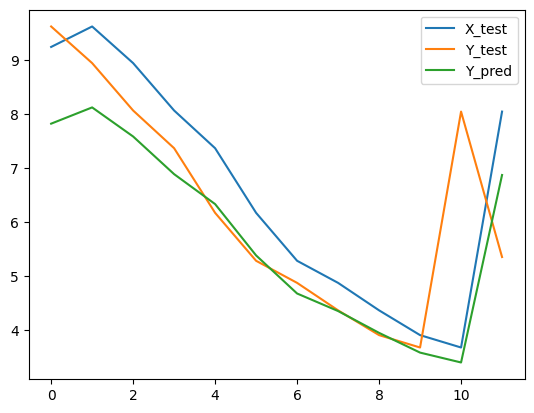

In [14]:
res.plot()